In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier as xgboost
import pickle
from sklearn import svm

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Disease_Prediction_dataset/Training.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Disease_Prediction_dataset/Testing.csv')

In [ ]:
df_train.drop('Unnamed: 133', axis= 1, inplace=True)

In [ ]:
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [ ]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
clf1 = RandomForestClassifier(random_state=1)
clf1.fit(x_train, y_train)
pred1 = clf1.predict(x_test)
print(pred1)
print(y_test)

In [ ]:
# pred1_encode = pd.get_dummies(pred1)
class_rep1= classification_report(y_test, pred1)
acc1 = accuracy_score(y_test, pred1)

In [ ]:
clf2 = xgboost(n_estimators=100,random_state=0).fit(x_train, y_train)
acc2 =clf2.score(x_test, y_test)

In [ ]:
pred2 = clf2.predict(x_test)
class_rep2= classification_report(y_test, pred2)
print(class_rep2)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

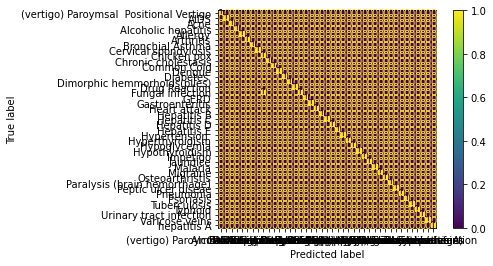

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2, x_test, y_test)  
plt.show() 

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

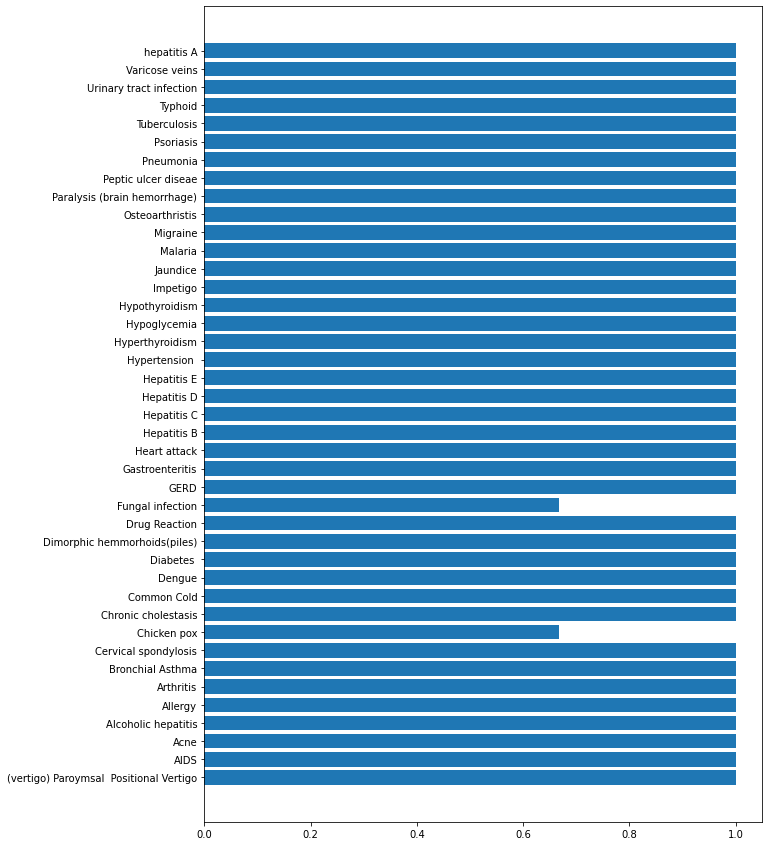

In [ ]:
names = clf2.classes_
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred2, average=None)
plt.figure(figsize=(10, 15))  # width:20, height:3
plt.barh(names, f1, align='center')
# plt.xlabel('Classifier')
# plt.ylabel("Accuracy")
# plt.title('Accuracy')
# plt.show()
f1

In [ ]:
clf3 = svm.SVC(gamma='auto')
clf3.fit(x_train, y_train)

SVC(gamma='auto')

In [ ]:
pred3 = clf3.predict(x_test)
class_rep3= classification_report(y_test, pred3)
print(class_rep3)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 29.6 MB/s 


In [ ]:
import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
feature_names = list(x_train.columns)
eli5.explain_weights(clf2, feature_names = feature_names, top = 5)

Explanation(estimator="GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n                           learning_rate=0.1, loss='deviance', max_depth=3,\n                           max_features=None, max_leaf_nodes=None,\n                           min_impurity_decrease=0.0, min_impurity_split=None,\n                           min_samples_leaf=1, min_samples_split=2,\n                           min_weight_fraction_leaf=0.0, n_estimators=100,\n                           n_iter_no_change=None, presort='deprecated',\n                           random_state=0, subsample=1.0, tol=0.0001,\n                           validation_fraction=0.1, verbose=0,\n                           warm_start=False)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='pain_behind_the_eyes', weight=0.03359233340138736, std=0.08883535907705213, value=None), FeatureWeight(feature='high_fever', weight=0.02606180282352968, std=0.08726956009998457, value=None), FeatureWeight(feature='muscle_pain', weight=0.02529452141372568, std=0.0489729302854763, value=None), FeatureWeight(feature='blood_in_sputum', weight=0.024620312355881288, std=0.08422042912388629, value=None), FeatureWeight(feature='stomach_bleeding', weight=0.02458422568252401, std=0.058403668882609894, value=None)], remaining=127), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
for input, prediction, label, i in zip (x_test, pred2, y_test, range(len(pred2))):
  if prediction != label:
    print(i, 5*'::',input, 'has been classified as--> ', prediction, '<--and should be--> ', label)

41 :::::::::: mild_fever has been classified as-->  Chicken pox <--and should be-->  Fungal infection


In [ ]:
eli5.explain_prediction(clf2, x_test.iloc[41])

Explanation(estimator="GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n                           learning_rate=0.1, loss='deviance', max_depth=3,\n                           max_features=None, max_leaf_nodes=None,\n                           min_impurity_decrease=0.0, min_impurity_split=None,\n                           min_samples_leaf=1, min_samples_split=2,\n                           min_weight_fraction_leaf=0.0, n_estimators=100,\n                           n_iter_no_change=None, presort='deprecated',\n                           random_state=0, subsample=1.0, tol=0.0001,\n                           validation_fraction=0.1, verbose=0,\n                           warm_start=False)", description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='(vertigo) Paroymsal  Positional Vertigo', feature_weights=FeatureWeights(pos=[], neg=[FeatureWeight(feature='<BIAS>', weight=-3.813137191065242, std=None, value=1.0), FeatureWeight(feature='yellowish_skin', weight=-1.4635129642132503, std=None, value=0.0), FeatureWeight(feature='spinning_movements', weight=-0.5546266207938769, std=None, value=0.0), FeatureWeight(feature='unsteadiness', weight=-0.4406345918545451, std=None, value=0.0), FeatureWeight(feature='yellowing_of_eyes', weight=-0.2926271706757691, std=None, value=0.0), FeatureWeight(feature='dark_urine', weight=-0.1950859813320695, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=3.601855622937965e-05, score=-6.759624519934751, weighted_spans=None, heatmap=None), TargetExplanation(target='AIDS', feature_weights=FeatureWeights(pos=[], neg=[FeatureWeight(feature='<BIAS>', weight=-3.8171469984442137, std=None, value=1.0), FeatureWeight(feature='yellowish_skin', weight=-1.4635129645406133, std=None, value=0.0), FeatureWeight(feature='patches_in_throat', weight=-0.4591155340124302, std=None, value=0.0), FeatureWeight(feature='muscle_wasting', weight=-0.3614551589610393, std=None, value=0.0), FeatureWeight(feature='yellowing_of_eyes', weight=-0.2926271704180215, std=None, value=0.0), FeatureWeight(feature='dark_urine', weight=-0.19508598133173374, std=None, value=0.0), FeatureWeight(feature='extra_marital_contacts', weight=-0.16714493160883948, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=3.614613535536578e-05, score=-6.75608873931689, weighted_spans=None, heatmap=None), TargetExplanation(target='Acne', feature_weights=FeatureWeights(pos=[], neg=[FeatureWeight(feature='<BIAS>', weight=-3.817147594671077, std=None, value=1.0), FeatureWeight(feature='yellowish_skin', weight=-1.463512964540613, std=None, value=0.0), FeatureWeight(feature='scurring', weight=-0.4607413327879982, std=None, value=0.0), FeatureWeight(feature='yellowing_of_eyes', weight=-0.2926271704180215, std=None, value=0.0), FeatureWeight(feature='pus_filled_pimples', w

In [ ]:
# s = pickle.dumps(clf3)
# model = pickle.loads(s)

sample_list = list(x_train.columns.values)
file_name = "sample.pkl"

open_file = open(file_name, "wb")
pickle.dump([sample_list, clf3], open_file)
open_file.close()



In [ ]:
inp = ['itching', 'skin rash','nodal skin eruptions']
# col_names = x_train.columns.values
import pickle
import numpy as np
def pred (inp, file_name = 'sample.pkl'):
    open_file = open(file_name, "rb")
    names, model = pickle.load(open_file)
    open_file.close()
    col = list(names)
    col = [i.replace('_', ' ') for i in col]
    out = np.zeros(len(col))
    for i in inp:
        for j in range(len((col))):
            if i == col[j]:
                out[j] = 1
                break
            else:
                if out[j] == 1:
                    continue
    out = out.reshape((1, -1))
    pred = model.predict(out)
    return pred

prediction = pred(inp)
print(prediction)


['Fungal infection']
